In [14]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

**Step 2: Data Import.**

In [15]:
df_cust = pd.read_csv('datasets/customers.csv')
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [16]:
df_cust.shape

(1000, 8)

In [17]:
df_cs = pd.read_csv('datasets/credit_profiles.csv')
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [18]:
df_cs.shape

(1004, 6)

In [19]:
df_trans = pd.read_csv('datasets/transactions.csv')
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [20]:
df_trans.shape

(500000, 7)

**Step 3: Data Cleaning**

In [21]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


-> Check for presence of null values or outliers. Treat null values first.


In [22]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

We can see that 'annual_income' column has 50 null values. Let us fix it.

In [23]:
df_cust[df_cust.annual_income.isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


We can treat NA values in 3 ways. 1- Replacing them with Mean. 2- Replacing them with Median. 3- Removing them completely.

Since there are 50 rows (which is a big amount), removing is not a wise idea. Since there are outliers also, mean would give a wrong assumption. So better to go with Median

In [24]:
df_cust.annual_income.median()

112218.5

As we can see, the median income for all 1000 customers is 112218.5 USD. But this may not be the same for every occupation. So the better option would be to find median for each separate occupation and replace that particular median value.

In [25]:
df_cust[df_cust['occupation'] == 'Artist'].annual_income.median()

45794.0

In [26]:
df_cust[df_cust['occupation'] == 'Data Scientist'].annual_income.median()

135759.0

In [27]:
occupationWiseMedian = df_cust.groupby('occupation')['annual_income'].median()
occupationWiseMedian

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [28]:
occupationWiseMedian['Accountant']

65265.0

let us write a function now to update the dataframe

In [29]:
def getMedian(row):
    if pd.isnull(row['annual_income']):
        return occupationWiseMedian[row['occupation']]
    else:
        return row['annual_income']

In [30]:
df_cust['annual_income']=df_cust.apply(getMedian, axis= 1)

In [31]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

Alternatively, you can also use lambda: x function without explicity defining a function

In [32]:
df_cust.iloc[[12, 82, 83]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
12,13,Vivaan Batra,Male,24,City,Freelancer,25399.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single
83,84,Advik Sethi,Male,43,Rural,Consultant,15804.0,Married


the checking is complete. only NA values have been changed. Other values remain as it is.

<function matplotlib.pyplot.show(close=None, block=None)>

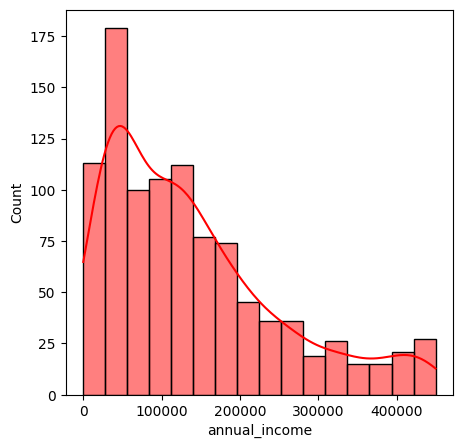

In [33]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust.annual_income, kde= True, color= 'red', label= 'data')
plt.show

Let us remove the outliers now

In [34]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


We can see that the minimum income here is 2 USD per year which is not possible for a dataset used for trial run. 

In [35]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


As we can see, we have these rows which are outliers. We cant remove them. WE fix them.

In [36]:
for index, rows in df_cust.iterrows():
    if rows['annual_income'] < 100:
        df_cust.at[index, 'annual_income'] = occupationWiseMedian[row['occupation']]

NameError: name 'row' is not defined

In [ ]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [ ]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,141528.354500
std,288.819436,15.666155,110742.774021
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115715.000000
75%,750.250000,46.000000,196590.500000
max,1000.000000,135.000000,449346.000000


**Data Visualization**

In [ ]:
occupationWiseMedian

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [ ]:
occupationWiseMedian.index, occupationWiseMedian.values

(Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
        'Data Scientist', 'Freelancer', 'Fullstack Developer'],
       dtype='object', name='occupation'),
 array([ 65265. ,  45794. , 261191.5,  58017. , 135759. ,  46759. ,
         76774. ]))

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/2908094762.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =occupationWiseMedian.index, y = occupationWiseMedian.values, palette= 'tab10' )


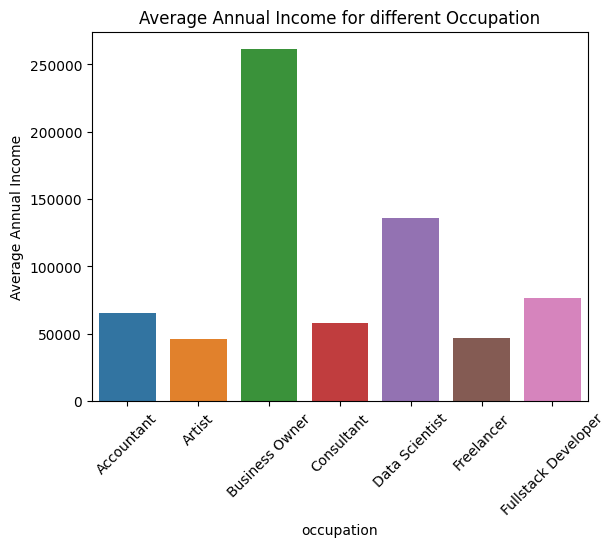

In [ ]:
sns.barplot(x =occupationWiseMedian.index, y = occupationWiseMedian.values, palette= 'tab10' )
plt.xticks(rotation = 45)
plt.title('Average Annual Income for different Occupation')
plt.xlabel('occupation')
plt.ylabel('Average Annual Income')
plt.show()

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/2169550676.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='tab10', ax=axes[i])
/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/2169550676.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(avg_income_per_group.index, rotation=45)
/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/2169550676.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='ta

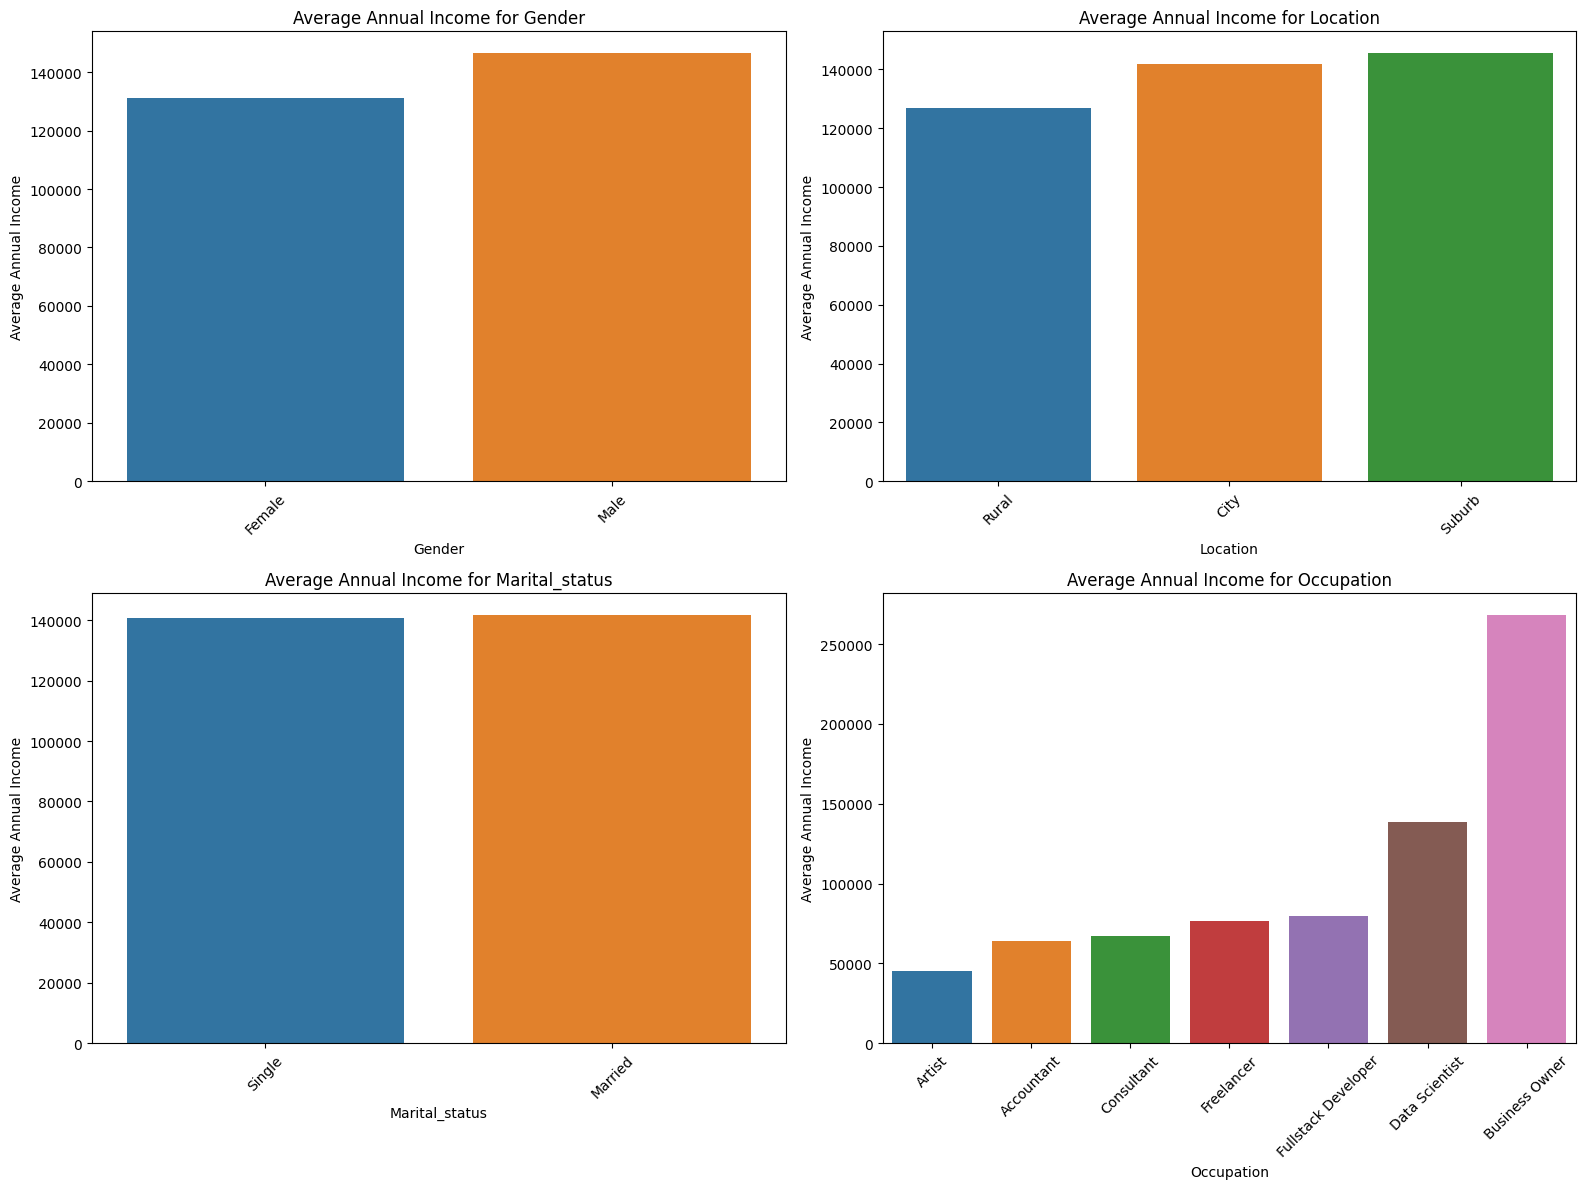

In [ ]:
categorical_columns = ['gender', 'location', 'marital_status', 'occupation']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='tab10', ax=axes[i])
    axes[i].set_xticklabels(avg_income_per_group.index, rotation=45)
    axes[i].set_title(f'Average Annual Income for {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Average Annual Income')

# Adjust layout
plt.tight_layout()
plt.show()

*Remove outliers from age column*

In [ ]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,141528.354500
std,288.819436,15.666155,110742.774021
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115715.000000
75%,750.250000,46.000000,196590.500000
max,1000.000000,135.000000,449346.000000


In [ ]:
df_cust[df_cust.age < 15]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married
845,846,Rohan Jaiswal,Male,1,City,Consultant,20838.0,Married
855,856,Aanya Taneja,Female,2,City,Fullstack Developer,30689.0,Married
895,896,Krishna Goswami,Male,1,City,Freelancer,31533.0,Married


Working class is generally over 15

In [ ]:
df_cust[df_cust.age > 80]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
703,704,Aanya Sharma,Female,110,City,Freelancer,43404.0,Single
709,710,Anika Verma,Female,110,City,Data Scientist,98417.0,Married
728,729,Rehan Yadav,Male,135,City,Business Owner,382836.0,Married
832,833,Ridhi Raj,Female,110,City,Fullstack Developer,95379.0,Single


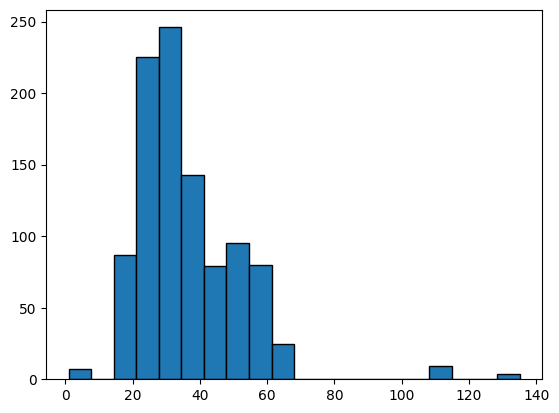

In [ ]:
plt.hist(df_cust.age, bins = 20, edgecolor = 'black')
plt.show()

In [ ]:
df_cust.age.median()

32.0

In [ ]:
df_cust.groupby('occupation').age.median()

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

When we just find the median of all, we get 32. But when we group by occupation, we get different medians for each. This approach is there for better to get a clear picture of the assumed values.

In [ ]:
medianAge=df_cust.groupby('occupation').age.median()
medianAge

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [ ]:
outlier_age = df_cust[(df_cust.age < 15) | (df_cust.age > 80)]
outlier_age

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [ ]:
for index, rows in outlier_age.iterrows():
    df_cust.at[index, 'age'] = medianAge[row['occupation']]

In [ ]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [ ]:
df_cust[(df_cust.age < 15) | (df_cust.age > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [ ]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.886000,141528.354500
std,288.819436,12.371825,110742.774021
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115715.000000
75%,750.250000,46.250000,196590.500000
max,1000.000000,64.000000,449346.000000


Data Visualization - Analyazing customer distribution per age group. 1- Youngsters(18-25) 2- Mid Age Professionals(25-48) 3- Seniors(49-65)

In [ ]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


Create a new column in the dataframe - age group

In [ ]:
bin_edges = [17, 25, 48, 65]
bin_labels = ['18-25', '26-48', '49-65']

#Use cut function to bin and label the column

df_cust['age_group'] = pd.cut(df_cust['age'], bins= bin_edges, labels = bin_labels)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [ ]:
age_group_counts = df_cust.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
26-48    55.7
18-25    24.0
49-65    20.3
Name: proportion, dtype: float64

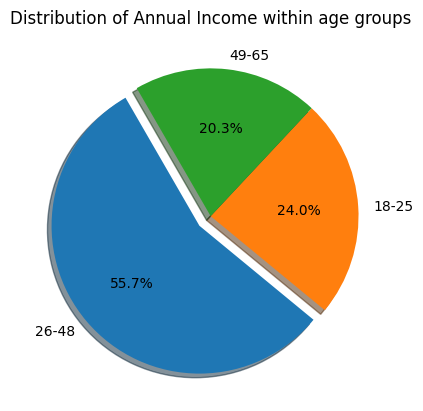

In [ ]:
plt.pie(age_group_counts, labels=age_group_counts.index, autopct= '%1.1f%%', shadow= True, explode= (0.1,0,0), startangle= 120)
plt.title('Distribution of Annual Income within age groups')
plt.show()

In [ ]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [ ]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [ ]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [ ]:
df_cust.groupby(['location', 'gender']).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [ ]:
customerLocGen = df_cust.groupby(['location', 'gender']).size().unstack()
customerLocGen

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


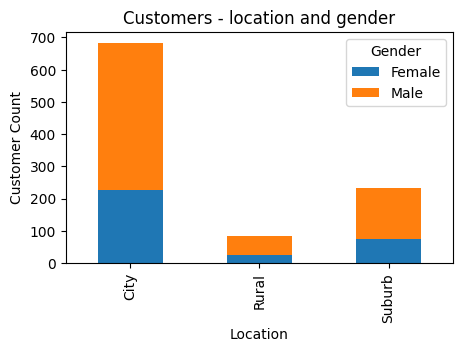

In [ ]:
customerLocGen.plot(kind= 'bar', stacked= True, figsize= (5,3), )
plt.title('Customers - location and gender')
plt.legend(title = 'Gender')
plt.xlabel('Location')
plt.ylabel('Customer Count')
plt.show()

# Explore Credit Score Table

In [ ]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [ ]:
df_cs.shape

(1004, 6)

In [ ]:
df_cust.shape

(1000, 9)

as we can see, the cutomer datframe only has 1000 values but the customer transactions one has 1004 values. This implies that the customer transactions have duplicates

In [ ]:
df_cs['cust_id'].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [ ]:
df_cs.cust_id.nunique()

1000

We can again confirm that there only 1000 unique records here. Meaning  some are duplicated

In [ ]:
df_cs[df_cs.cust_id.duplicated(keep= False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [ ]:
df_cs_clean_1 = df_cs.drop_duplicates(subset='cust_id', keep= 'last')
df_cs_clean_1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [ ]:
df_cs_clean_1.cust_id.nunique()

1000

In [ ]:
df_cs_clean_1[df_cs_clean_1.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [ ]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [ ]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


We now need to replace the null values of the credit limit. But like previoiusly, we cannot use the median method to do it because clearly, everyone will have different credit limits. 

In [ ]:
df_cs_clean_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

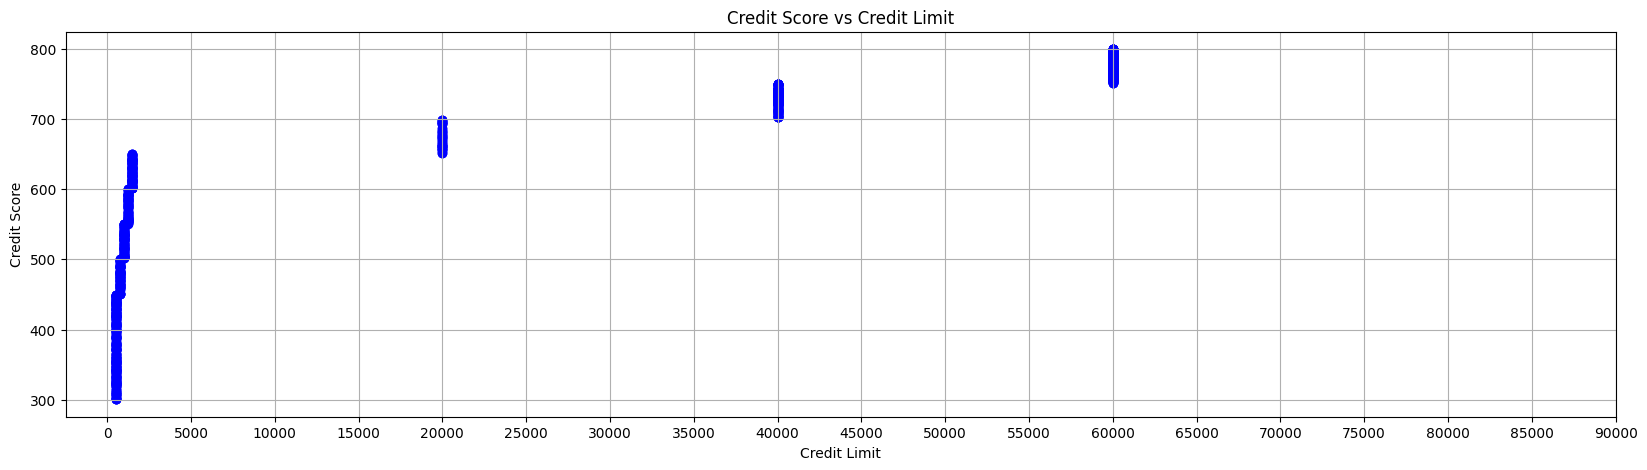

In [ ]:
plt.figure(figsize=(20, 5))
plt.scatter(df_cs_clean_1.credit_limit, df_cs_clean_1.credit_score, color = 'blue', marker= 'o', label = ' data points')
plt.title('Credit Score vs Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.xticks(range(0,90001, 5000))
plt.grid(True)
plt.show()

In [ ]:
bin_ranges = [299, 450, 500, 550, 600, 650, 700, 750, 800]
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

bin_labels

['299-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [ ]:
df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'], bins= bin_ranges, labels= bin_labels)
df_cs_clean_1.head()

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/912327699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean_1['credit_score_range'] = pd.cut(df_cs_clean_1['credit_score'], bins= bin_ranges, labels= bin_labels)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [ ]:
df_cs_clean_1[df_cs_clean_1.credit_score_range== '700-749']

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


Let us find the mode for this.

In [ ]:
df_cs_clean_1[df_cs_clean_1.credit_score_range== '700-749']

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


There is no explicite 'mode' function in a df like a mean or a median. So we use .agg() function and use lambda to apply it to every row. The reset_index() returns the output as a df

In [ ]:
mode_df = df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/125336137.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_df = df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()


,credit_score_range,credit_limit
0,299-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [ ]:
df_cs_clean_2 = pd.merge(df_cs_clean_1, mode_df, on= 'credit_score_range', suffixes= ("", "_mode"))
df_cs_clean_2.shape

(1000, 8)

In [ ]:
df_cs_clean_3 = df_cs_clean_2.copy()

In [ ]:
df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'], inplace= True)

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/167911271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'], inplace= True)


In [ ]:
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [ ]:
df_cs_clean_3.shape

(1000, 8)

In [ ]:
df_cs_clean_3.iloc[[717, 869]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
717,718,481,0.127147,68.0,0.0,750.0,450-499,750.0
869,870,355,0.215661,93.0,4.0,500.0,299-449,500.0


Now, let us continue analyzing the df_cs_clean_3 df to check if any other column has any issue


In [ ]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


Now, if you see the outstanding_debt column, the max value is over 200k. When a customer only has a credit limit of 60k, it is not possible to have a debt of over 200k

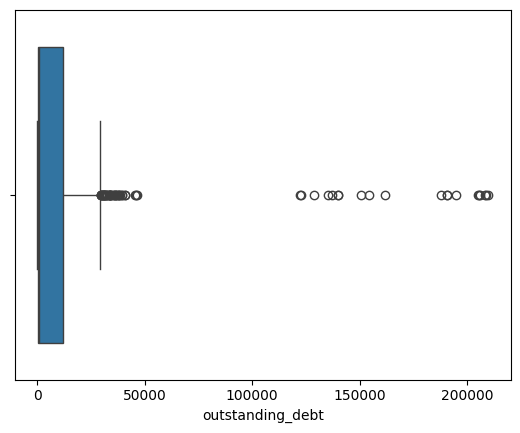

In [ ]:
sns.boxplot(x = df_cs_clean_3.outstanding_debt)
plt.show()

From the above graph, we can clearly see that there are so many outliers

In [ ]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,299-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,299-449,500.0


this time, we will replace the outstanding_debt with just the credit_limit

In [ ]:
df_cs_clean_3.loc[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit, 'outstanding_debt'] = df_cs_clean_3.credit_limit

In [ ]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt > df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


<Axes: xlabel='outstanding_debt'>

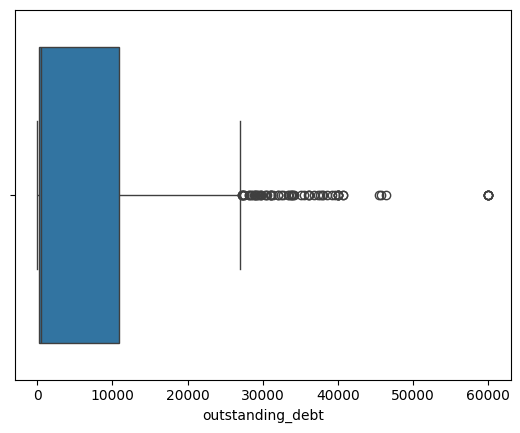

In [ ]:
sns.boxplot(x = df_cs_clean_3.outstanding_debt)

no more outliers

### Bi Variate Analysis

In [ ]:
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [ ]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [ ]:
df_merged = df_cust.merge(df_cs_clean_3, on = 'cust_id', how= 'inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [ ]:
df_merged[['credit_score', 'credit_limit']]

,credit_score,credit_limit
0,749,40000.0
1,587,1250.0
2,544,1000.0
3,504,1000.0
4,708,40000.0
...,...,...
995,564,1250.0
996,774,60000.0
997,529,1000.0
998,725,40000.0


In [ ]:
df_merged[['credit_score', 'credit_limit']].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847951
credit_limit,0.847951,1.000000


In [ ]:
df_merged[['credit_score', 'age']].corr()

,credit_score,age
credit_score,1.000000,0.435564
age,0.435564,1.000000


In [ ]:
numerical_columns = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income', 'age']
correlation_matrix = df_merged[numerical_columns].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847951,0.567870,0.435564
credit_utilisation,-0.070445,1.000000,0.192838,-0.080504,-0.079349,-0.020515
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.548552,0.428306
credit_limit,0.847951,-0.080504,0.810581,1.000000,0.675863,0.494828
annual_income,0.567870,-0.079349,0.548552,0.675863,1.000000,0.597382
age,0.435564,-0.020515,0.428306,0.494828,0.597382,1.000000


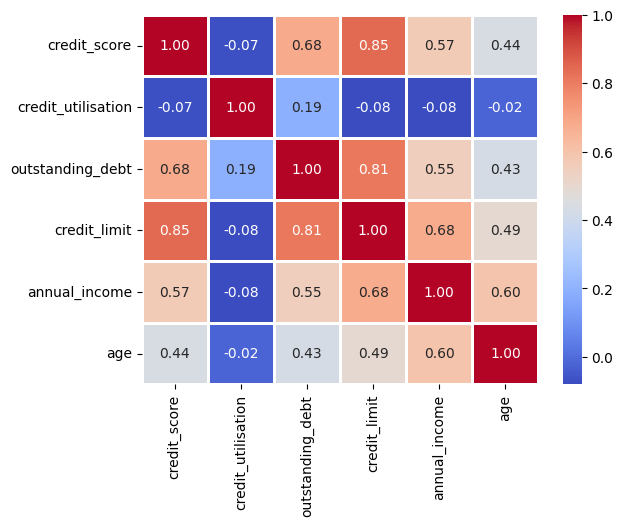

In [ ]:
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', linewidths= 0.8, fmt='.2f')
plt.show()

## Handling Null Values in Transactions Table

In [ ]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [ ]:
df_trans.shape

(500000, 7)

In [ ]:
df_trans.isna().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [ ]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


As we can see, the platform column in the transactions table has 4941 null values. let us deal with them

In [ ]:
df_trans['platform'].value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

one approach is we can directly find the mode and replace all NaN values with that mode. But generally, people prefer one particular website for one particular category of goods. 

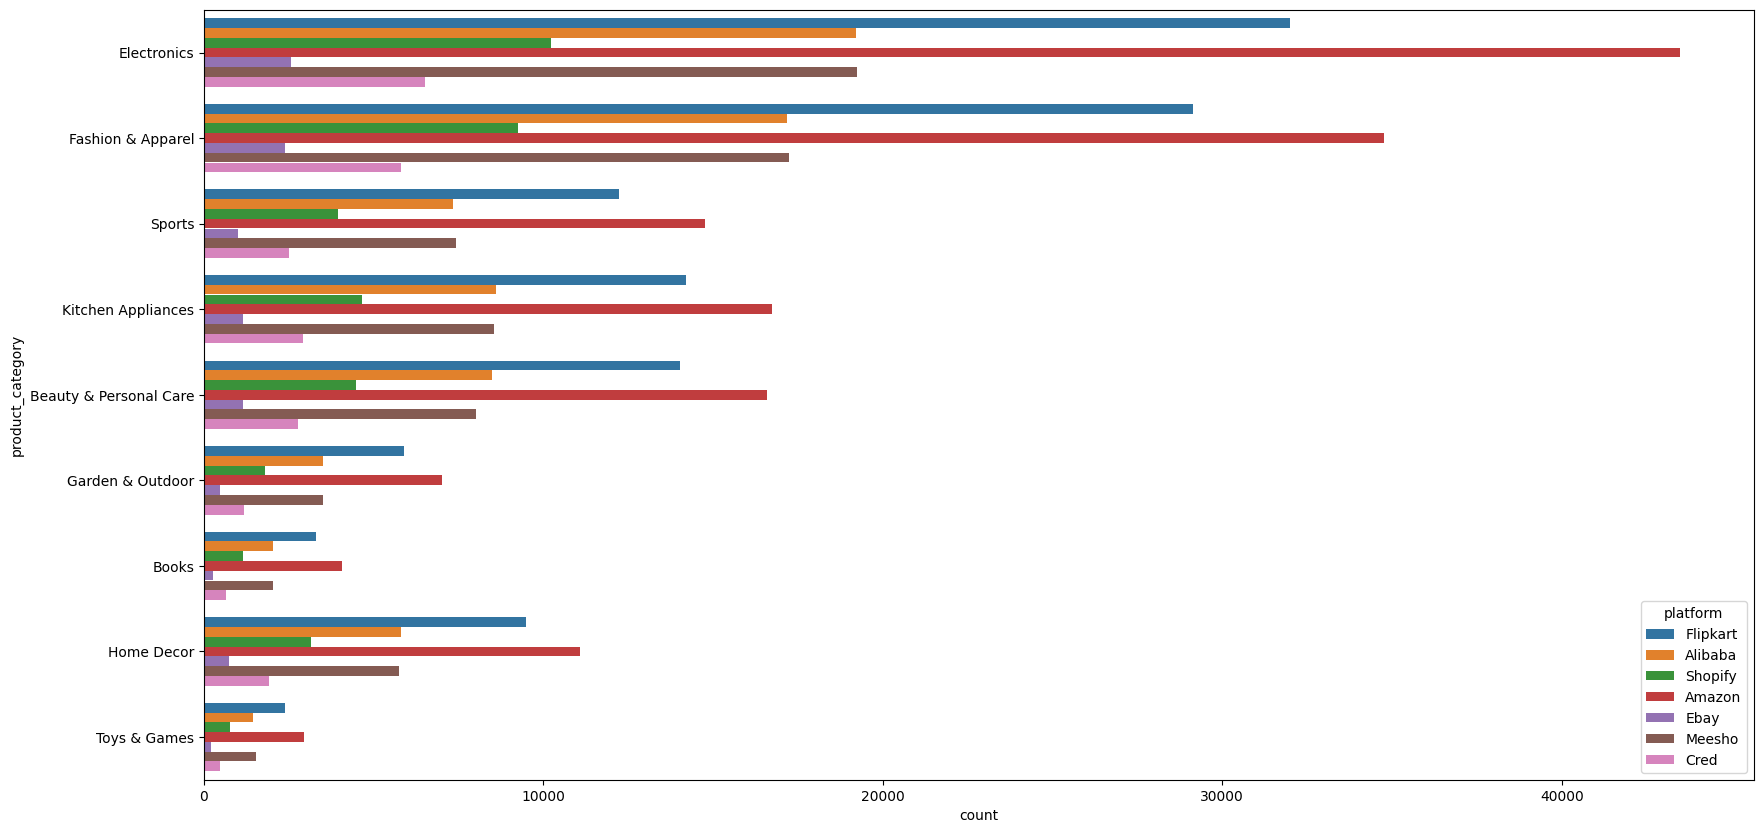

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(y='product_category', hue='platform', data=df_trans)
plt.show()

In [ ]:
df_trans.platform.mode()[0]

'Amazon'

In [ ]:
df_trans.fillna(df_trans.platform.mode()[0], inplace= True)
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [ ]:
df_trans.isna().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

### Treating Outliers using Inter Quartile Range (IQR)

In [ ]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


According to the problem statement, transaction amount cannot be zero

In [ ]:
df_trans_zero = df_trans[df_trans.tran_amount == 0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


By the looks of it, all transaction amounts which have zero has amazon, electronics and credit card respectively. Let us confirm it'

In [ ]:
df_trans_zero[['platform', 'product_category', 'payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [ ]:
df_trans_1 = df_trans[(df_trans.platform == 'Amazon')&(df_trans.product_category == 'Electronics')&(df_trans.payment_type == 'Credit Card')]
df_trans_1

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [ ]:
medianToReplace = df_trans_1[df_trans_1.tran_amount > 1].tran_amount.median()
medianToReplace

554.0

In [ ]:
df_trans.loc[df_trans['tran_amount'] == 0, 'tran_amount'] = medianToReplace
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [ ]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


In [ ]:
df_trans[df_trans['tran_amount'] == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


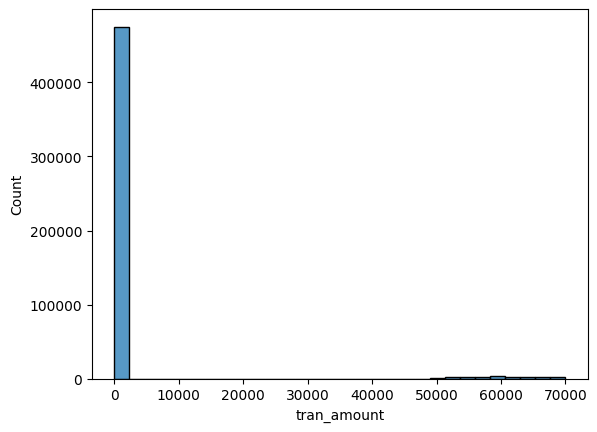

In [ ]:
sns.histplot(df_trans.tran_amount, bins = 30)
plt.show()

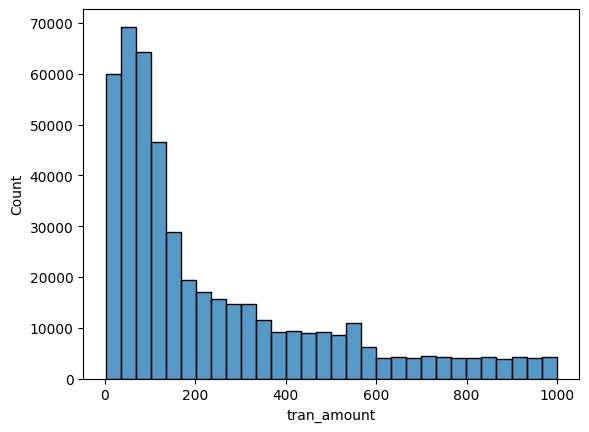

In [ ]:
sns.histplot(df_trans[df_trans.tran_amount < 10000].tran_amount, bins = 30)
plt.show()

We can see that the distribution is not normal. It is right skewed. So let us Use IQR

In [ ]:
Q1, Q3 = df_trans.tran_amount.quantile([0.25, 0.75])
Q1, Q3

(66.0, 413.0)

In [ ]:
IQR = Q3 - Q1
IQR

347.0

In [ ]:
lower = Q1- 1.5* IQR
upper = Q3+ 1.5* IQR

lower, upper

(-454.5, 933.5)

The values are a bit strict. So let us modify it a bit more. 

In [ ]:
lower = Q1- 2* IQR
upper = Q3+ 2* IQR

lower, upper

(-628.0, 1107.0)

Now, the values look a bit more reasonable.

In [ ]:
df_trans_outliters = df_trans[df_trans.tran_amount > upper]
df_trans_outliters.shape

(25000, 7)

In [ ]:
df_trans_normal = df_trans[df_trans.tran_amount < upper]
df_trans_normal.shape

(475000, 7)

In [ ]:
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [ ]:
tran_mean_per_category = df_trans_normal.groupby('product_category')['tran_amount'].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [ ]:
df_trans.loc[df_trans_outliters.index, 'tran_amount'] = df_trans_outliters['product_category'].map(tran_mean_per_category)

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/3265493838.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 92.16720517  50.33329759 176.77328782 ... 269.18163136 269.18163136
  64.55346325]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_trans.loc[df_trans_outliters.index, 'tran_amount'] = df_trans_outliters['product_category'].map(tran_mean_per_category)


In [ ]:
df_trans.loc[df_trans_outliters.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


Let us plot the histogram again now

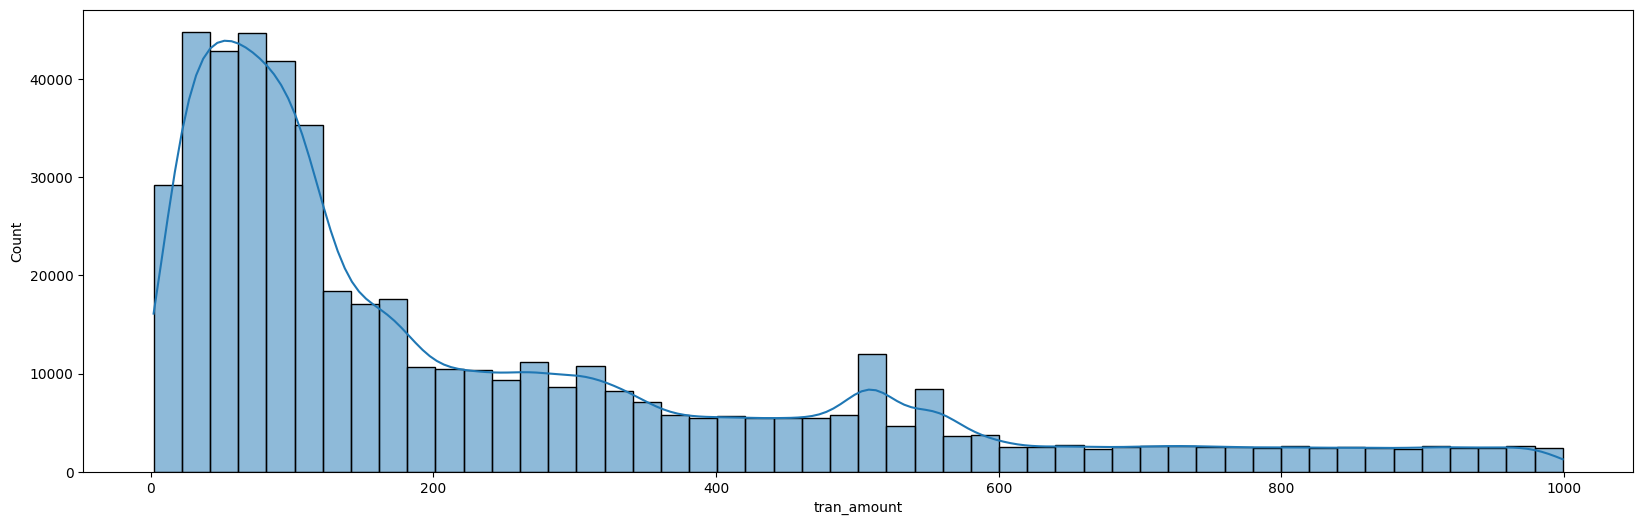

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(df_trans.tran_amount, kde= True, bins = 50)
plt.show()

### Data Visualization of Transacations Table

In [ ]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


In [ ]:
df_trans.shape

(500000, 7)

In [ ]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711635,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


#### Let us analyse the distrubtion of values in payment type

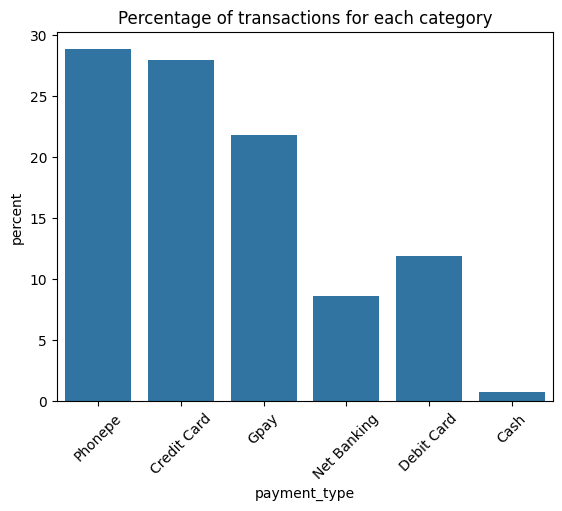

In [ ]:
sns.countplot(x = df_trans.payment_type, stat='percent')
plt.title('Percentage of transactions for each category')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df_merged_2 = pd.merge(df_merged, df_trans, on = 'cust_id', how = 'inner')
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


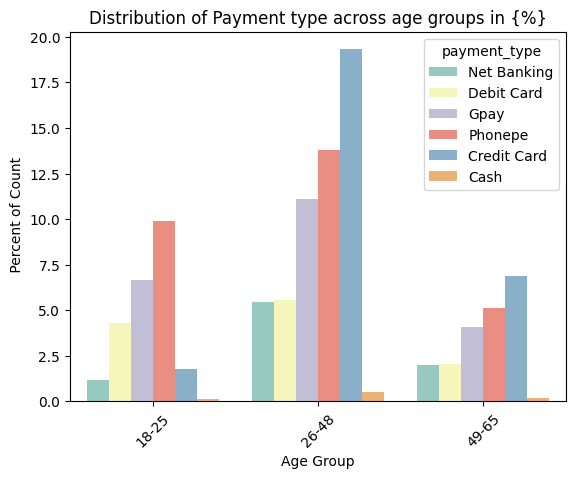

In [ ]:
sns.countplot(x = df_merged_2['age_group'], hue= df_merged_2['payment_type'], stat = 'percent', palette='Set3')
plt.xticks(rotation = 45)
plt.title('Distribution of Payment type across age groups in {%}')
plt.xlabel('Age Group')
plt.ylabel(' Percent of Count')
plt.show()

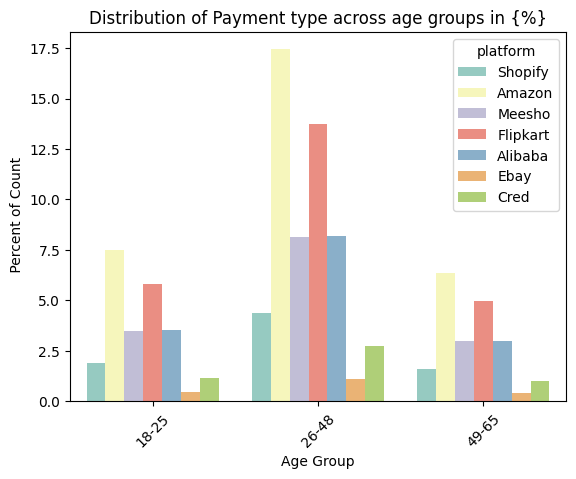

In [ ]:
sns.countplot(x = df_merged_2['age_group'], hue= df_merged_2['platform'], stat = 'percent', palette='Set3')
plt.xticks(rotation = 45)
plt.title('Distribution of Payment type across age groups in {%}')
plt.xlabel('Age Group')
plt.ylabel(' Percent of Count')
plt.show()

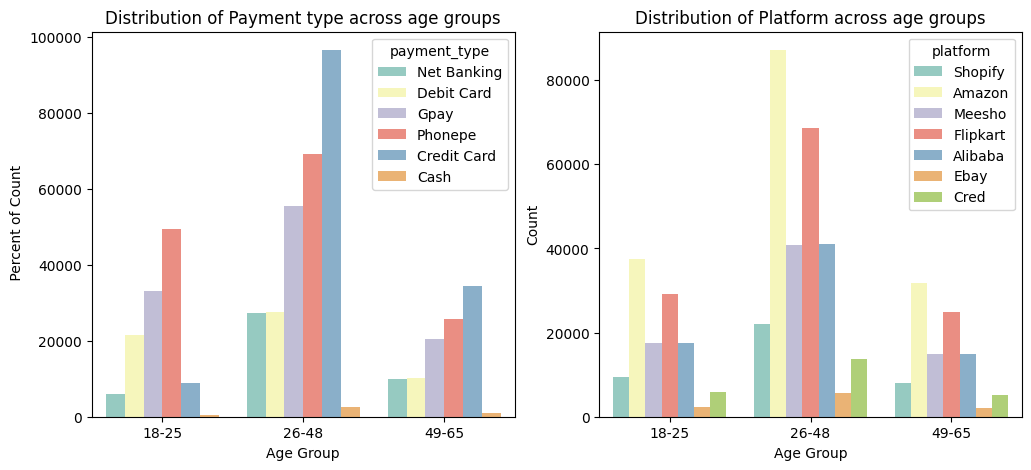

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(x = df_merged_2['age_group'], hue= df_merged_2['payment_type'], palette='Set3', ax= ax1)
ax1.set_title('Distribution of Payment type across age groups')
ax1.set_xlabel('Age Group')
ax1.set_ylabel(' Percent of Count')

sns.countplot(x = df_merged_2['age_group'], hue= df_merged_2['platform'], palette='Set3', ax= ax2 )
ax2.set_title('Distribution of Platform across age groups')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
plt.show()

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/2907470427.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()


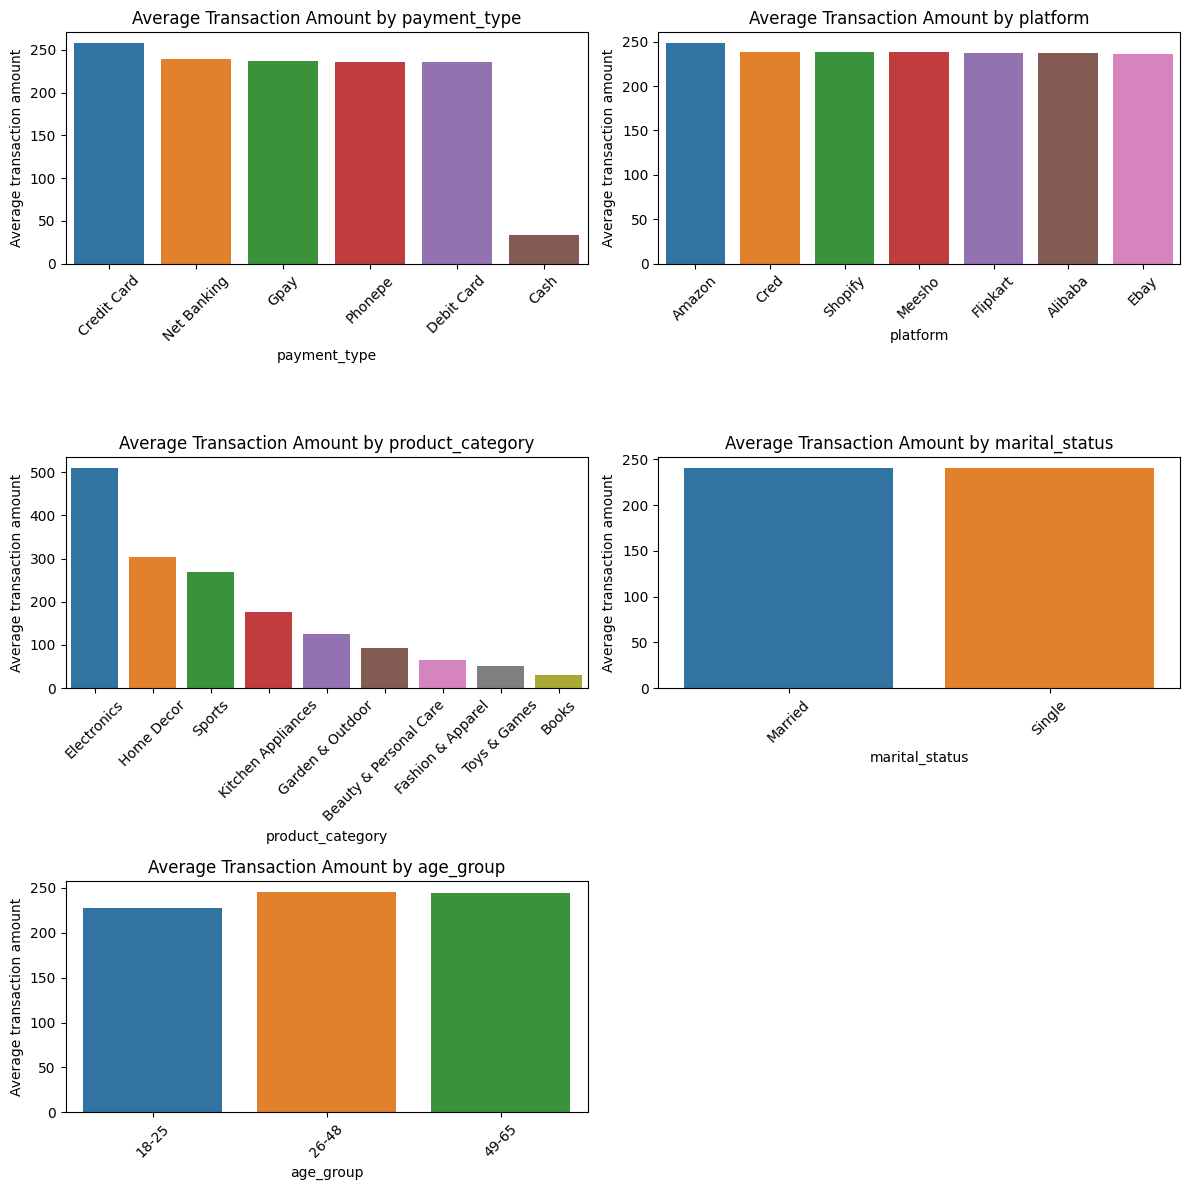

In [ ]:
# Make a list of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

# Now, create subplots for each of the categorical columns
for i, cat_col in enumerate(cat_cols):
    # Calculate average transaction amount for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()

    # Sort the data before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)

    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, errorbar=None, ax=axes[i], palette='tab10', hue = cat_col)
    axes[i].set_title(f'Average Transaction Amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Further Analysis on Age Group

In [ ]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [ ]:
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/2478570349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()


,age_group,annual_income,credit_limit,credit_score
0,18-25,36347.695833,886.458333,482.216667
1,26-48,148906.684022,20702.423698,598.017953
2,49-65,245634.899015,39357.142857,691.399015


/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/1582217431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'age_group', y = 'annual_income', data = age_group_metrics, palette='tab10',ax = ax1)
/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/1582217431.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'age_group', y = 'credit_limit', data = age_group_metrics, palette='tab10',ax = ax2)
/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_62382/1582217431.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

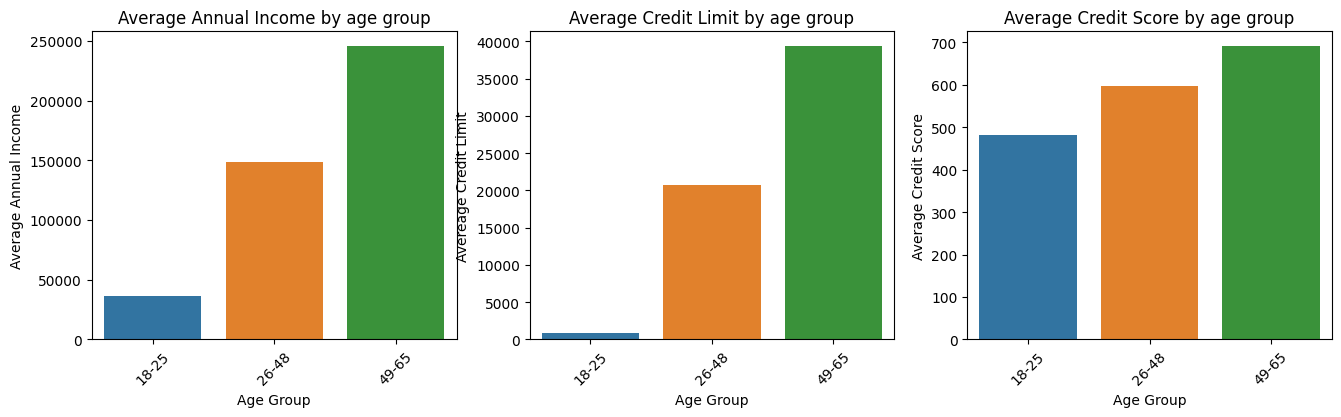

In [ ]:
# Create Sub Plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 4))

#Plot 1
sns.barplot(x = 'age_group', y = 'annual_income', data = age_group_metrics, palette='tab10',ax = ax1)
ax1.set_title('Average Annual Income by age group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis = 'x', rotation = 45)

#Plot 2
sns.barplot(x = 'age_group', y = 'credit_limit', data = age_group_metrics, palette='tab10',ax = ax2)
ax2.set_title('Average Credit Limit by age group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Avereage Credit Limit')
ax2.tick_params(axis = 'x', rotation = 45)

#Plot 3
sns.barplot(x = 'age_group', y = 'credit_score', data = age_group_metrics, palette='tab10',ax = ax3)
ax3.set_title('Average Credit Score by age group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis = 'x', rotation = 45)

#### Target Group - 18-25

In [ ]:
import scipy

<h2 align="center" style="color:white">Phase 2: AtliQ0 Bank Credit Card Project</h2>

### Business Analysis and launch of AB testing: Targeting Untapped Market

### Insights specific to customers with age group of 18 - 25
1. People with age group of 18 -25 accounts to ~25% of customer base in the data
2. Avg annual income of this age group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and max credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Avg transaction amount made with credit cards is also low compared to other groups
5. Top 3 most used shopping products categories  : Electronics, Fashion & Apparel, Beauty & Personal care

![Analysis Image](analysis.png)

### (1) Pre-Campaign

We want to do a trial run for our new credit card. For this we need to figure out (1) How many customers do we need for our A/B testing. We will form a control and test group. For both of these groups we can figure out number of customers we need based on the statistical power and effect size that we agree upon after discussing with business. We will use 

In [ ]:
#import required libraries
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.4056989990348

For effect size 2 we need 393 customers. We have to keep in mind budgeting restrictions while running this campaign hence let us run this for different effect sizes and discuss with business to find out which sample size would be optimal

In [ ]:
# Calculate the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


Based on business requirements, the test should be capable of detecting a minimum 0.4 standard deviation difference between the control and test groups. For the effect size 0.4, we need 100 customers and when we discussed with business, 100 customers is ok in terms of their budgeting constraints for this trail run

#### Forming control and test groups

1.We have identified approximately 246 customers within the age group of 18 to 25. From this pool, we will select 100 customers for the initial campaign launch.

2.The campaign is launched for 100 customers, as determined by the effective size calculation and by considering budgeting costs, and will run campaign for a duration of 2 months

3.Got a conversion rate of ~40% ( implies 40 out of 100 customers in test group started using credit card)

4.To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be completely exclusive of initial 100 customers used as test group.

5.So now we have 40 customers in each of control and test groups

##### At the end of the 2-month campaign period (from 09-10-23 to 11-10-23), we obtained daily data showing the average transaction amounts made by the entire group of 40 customers in both the control and test groups using existing and newly launched credit cards respectively

##### The key performance indicator (KPI) for this AB test aims to enhance average transaction amounts facilitated by the new card

## (2) Post-Campaign

## Two Sample Z Test for Our Hypothesis Testing

In [46]:
# Loading campaign results data
df = pd.read_csv('datasets/avg_transactions_after_campaign.csv')
df.head(4)

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85


In [47]:
df.shape

(62, 3)

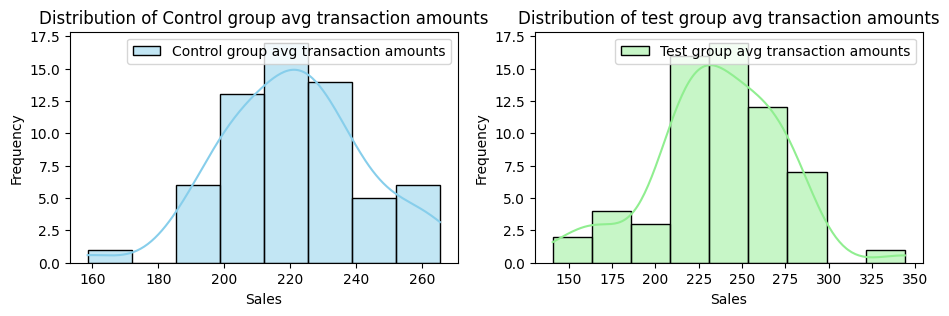

In [48]:
# Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# Plot the distribution of Campaign A Sales
sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

# Plot the distribution of Campaign B Sales
sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

# Show the plots
plt.show()

#### Perform Hypothesis Testing Using Two Sample Z-test

In [49]:
control_mean = df["control_group_avg_tran"].mean().round(2)
control_std = df["control_group_avg_tran"].std().round(2)
control_mean, control_std

(221.18, 21.36)

In [50]:
test_mean = df["test_group_avg_tran"].mean().round(2)
test_std = df["test_group_avg_tran"].std().round(2)
test_mean, test_std

(235.98, 36.66)

In [51]:
sample_size = df.shape[0]
sample_size

62

### Test Using Rejection Region (i.e. Critical Z Value)

In [52]:
a = (control_std**2/sample_size)
b = (test_std**2/sample_size)

Z_score = (test_mean-control_mean)/np.sqrt(a+b)
Z_score

2.7466072001806734

In [53]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

1.644853626951472

In [54]:
Z_score > critical_z_value

True

Since Z score is higher than critical Z value, we can reject the null hypothesis.

### Test Using p-Value

In [55]:
# Calculate the p-value corresponding to z score for a right-tailed test
p_value = 1 - st.norm.cdf(Z_score)
p_value

0.0030107601919702187

In [56]:
p_value < alpha # p value is less than significance level of 5% (or 0.05 for absolute value)

True

Since p value is less than significance level (i.e. alpha), we can reject the null hypothesis.

### Using Ready Made API call

1.We will now use stats module from statmodels for doing Z-test

2.The order of passing control and test group data to sm.stats.ztest(test_data, control_data) defines the direction of the test and influences the test results.

3.When you pass test group data first, z-test module assumes that alternative hypothesis as mean of the test group is greater than the mean of the control group and conversely if you switch the order z-test module assumes alternative hypothesis as control group average is more than test group 

4.In here we will be using order as sm.stats.ztest(test_group_data, control_group_data) based on our alternative hypothesis considered above.

5.By default z-test module in statmodels performs two tailed test. As we are doing one-tailed test in our case based on the direction and alternate hypothesis we have to set "alternative" parameter.

6.In out case based on test direction we will set "alternative" parameter to "larger"

#### How to choose right Alternative parameter

a.Two-tailed, meaning you are interested in identifying deviations across control and test groups in either direction 

b.larger, This is a one-tailed test, specifically looking for whether the first group is significantly larger than the second

c.smaller, This is another one-tailed test, specifically looking for whether the first group is significantly smaller than the second


In [57]:
# Performing Z-test with above considerations
z_statistic, p_value = sm.stats.ztest( df['test_group_avg_tran'],df['control_group_avg_tran'],alternative = 'larger')
z_statistic, p_value

(2.7482973745691135, 0.002995282462202502)

In [58]:
#Calculate the 95% Confidence Interval (CI) for the test group
test_group_CI = st.norm.interval(0.95, loc= test_mean, scale = test_std/np.sqrt(sample_size))
test_group_CI

(226.85475135624552, 245.10524864375446)